Height columns: ['Entity', 'Code', 'Year', 'Mean male height (cm)', 'Mean female height (cm)']
Life columns: ['Entity', 'Code', 'Year', 'Period life expectancy at birth']
Using height cols: Entity Year Mean male height (cm)
Using life cols:   Entity Year Period life expectancy at birth
Merged dataset rows: 201
          Country   AvgHeight  LifeExpectancy
0     Afghanistan  165.255861         66.0346
1         Albania  173.388856         79.6019
2         Algeria  170.071800         76.2610
3  American Samoa  176.045121         72.8518
4         Andorra  176.060167         84.0406
Summary statistics
       AvgHeight  LifeExpectancy
count     201.00          201.00
mean      171.28           73.25
std         5.26            6.97
min       159.79           54.46
25%       167.08           67.79
50%       171.12           73.57
75%       174.92           78.34
max       182.54           85.51
                            OLS Regression Results                            
Dep. Variable:   

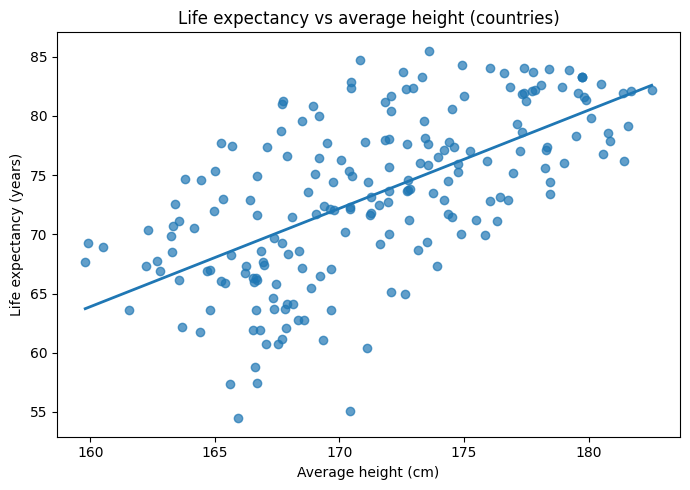

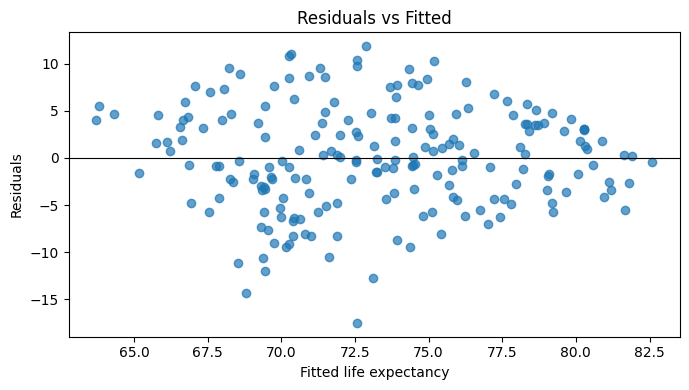

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# URLs (OWID grapher CSV endpoints)
height_url = "https://ourworldindata.org/grapher/average-height-by-year-of-birth.csv"
life_url   = "https://ourworldindata.org/grapher/life-expectancy.csv"

# Load CSVs
print("Downloading height data...")
h = pd.read_csv(height_url)
print("Height columns:", list(h.columns)[:10])
print("Downloading life expectancy data...")
le = pd.read_csv(life_url)
print("Life columns:", list(le.columns)[:10])

# Find sensible columns automatically
def find_column_containing(df, keywords):
    cols = df.columns
    for k in keywords:
        for c in cols:
            if k.lower() in c.lower():
                return c
    return None

# Height dataset (OWID grapher) often has: 'Entity', 'Code', 'Year' and a numeric column with 'height' in name
height_val_col = find_column_containing(h, ['height'])
height_entity_col = find_column_containing(h, ['entity','country','name'])
height_year_col = find_column_containing(h, ['year','birth'])

if any(x is None for x in [height_val_col, height_entity_col, height_year_col]):
    print("Could not auto-detect columns in height dataset. Detected columns:")
    print(h.columns)
    raise SystemExit("Please inspect the height CSV and set the column names manually.")

# Life expectancy dataset (OWID grapher) often has: 'Entity', 'Code', 'Year', and column like 'Life expectancy'
life_val_col = find_column_containing(le, ['life','life expectancy','life_expectancy'])
life_entity_col = find_column_containing(le, ['entity','country','name'])
life_year_col = find_column_containing(le, ['year'])

if any(x is None for x in [life_val_col, life_entity_col, life_year_col]):
    print("Could not auto-detect columns in life expectancy dataset. Detected columns:")
    print(le.columns)
    raise SystemExit("Please inspect the life expectancy CSV and set the column names manually.")

print("Using height cols:", height_entity_col, height_year_col, height_val_col)
print("Using life cols:  ", life_entity_col, life_year_col, life_val_col)

# Select latest available year per country
# For height: the grapher is by year of birth; pick the most recent available year (max)
h_latest = h.sort_values(by=height_year_col).groupby(height_entity_col, as_index=False).last()
h_latest = h_latest[[height_entity_col, height_val_col]].rename(columns={
    height_entity_col: 'Country',
    height_val_col: 'AvgHeight'
})

# For life expectancy: pick latest year per country
le_latest = le.sort_values(by=life_year_col).groupby(life_entity_col, as_index=False).last()
le_latest = le_latest[[life_entity_col, life_val_col]].rename(columns={
    life_entity_col: 'Country',
    life_val_col: 'LifeExpectancy'
})

# Merge
df = pd.merge(h_latest, le_latest, on='Country', how='inner')
df = df.dropna(subset=['AvgHeight','LifeExpectancy']).reset_index(drop=True)
print(f"Merged dataset rows: {len(df)}")
print(df[['Country','AvgHeight','LifeExpectancy']].head())

# Quick summary
print("Summary statistics")
print(df[['AvgHeight','LifeExpectancy']].describe().round(2))

# Fit OLS (GLM identical here)
X = sm.add_constant(df['AvgHeight'])
y = df['LifeExpectancy']
model = sm.OLS(y, X).fit()
print(model.summary())

# Scatter + regression line
plt.figure(figsize=(7,5))
plt.scatter(df['AvgHeight'], df['LifeExpectancy'], alpha=0.7)
# regression line (sorted by x for a smooth line)
x_sorted = np.linspace(df['AvgHeight'].min(), df['AvgHeight'].max(), 200)
y_line = model.params['const'] + model.params['AvgHeight'] * x_sorted
plt.plot(x_sorted, y_line, linewidth=2)
plt.xlabel('Average height (cm)')
plt.ylabel('Life expectancy (years)')
plt.title('Life expectancy vs average height (countries)')
plt.tight_layout()
plt.show()

# Residual plot
fitted = model.predict(X)
resid = model.resid
plt.figure(figsize=(7,4))
plt.scatter(fitted, resid, alpha=0.7)
plt.axhline(0, color='k', linewidth=0.8)
plt.xlabel('Fitted life expectancy')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.tight_layout()
plt.show()


In [ ]:
height = "https://ourworldindata.org/grapher/average-height-by-year-of-birth.csv?v=1&csvType=full&useColumnShortNames=true"

### Global Average Male and Female Height Over Time

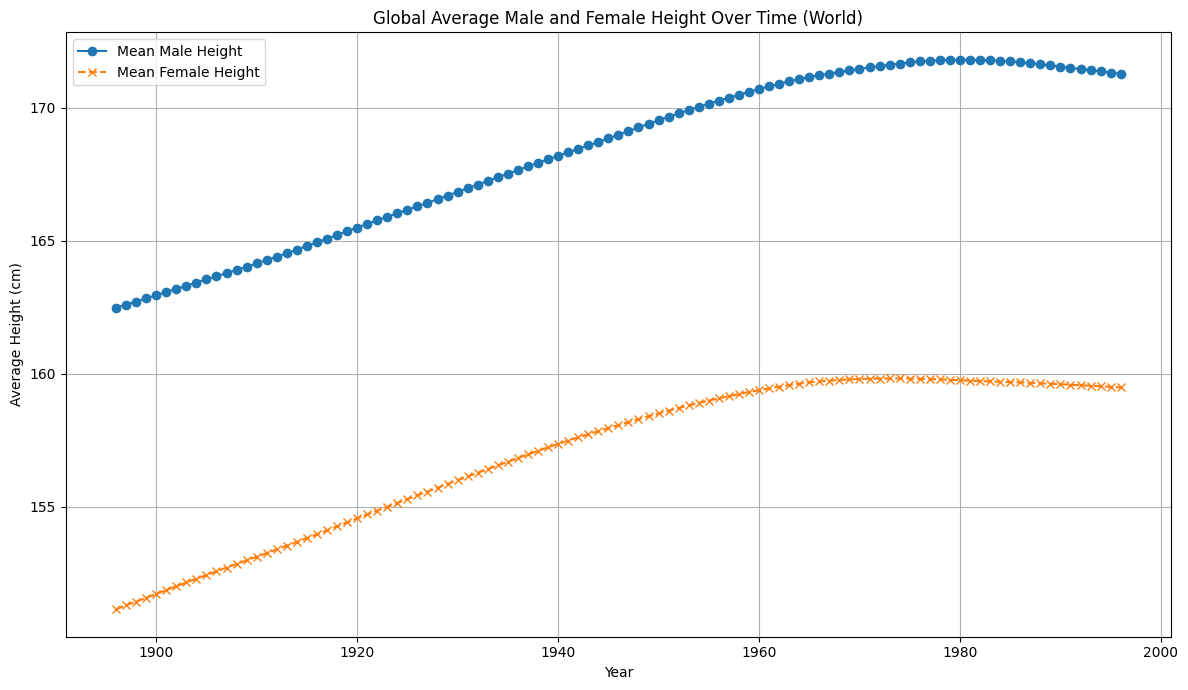

In [ ]:
import matplotlib.pyplot as plt

# Filter for 'World' entity for height data
world_height_data = h[h[height_entity_col] == 'World']

plt.figure(figsize=(12, 7))
plt.plot(
    world_height_data[height_year_col],
    world_height_data['Mean male height (cm)'],
    marker='o',
    linestyle='-',
    label='Mean Male Height'
)
plt.plot(
    world_height_data[height_year_col],
    world_height_data['Mean female height (cm)'],
    marker='x',
    linestyle='--',
    label='Mean Female Height'
)
plt.xlabel('Year')
plt.ylabel('Average Height (cm)')
plt.title('Global Average Male and Female Height Over Time (World)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
'life_expectancy'= "https://ourworldindata.org/grapher/life-expectancy-of-women-vs-life-expectancy-of-men.csv?v=1&csvType=full&useColumnShortNames=true"

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (ipython-input-1929356416.py, line 1)

### Global Life Expectancy Over Time

In [ ]:
import matplotlib.pyplot as plt

# Filter for 'World' entity for life expectancy
world_life_expectancy = le[le[life_entity_col] == 'World']

# Filter data to start from 1900
world_life_expectancy_filtered = world_life_expectancy[world_life_expectancy[life_year_col] >= 1900]

plt.figure(figsize=(10, 6))
plt.plot(world_life_expectancy_filtered[life_year_col], world_life_expectancy_filtered[life_val_col], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.title('Global Life Expectancy Over Time (World, from 1900)')
plt.grid(True)
plt.tight_layout()
plt.show()